In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_snapshot(filename, name): 

    print(f"Cargando {filename}...")
    df = pd.read_csv(filename)

    # 2. Reconstruir matrices 2D (Pivotear)
    rho = df.pivot(index='y', columns='x', values='rho').values
    ux = df.pivot(index='y', columns='x', values='ux').values
    uy = df.pivot(index='y', columns='x', values='uy').values
    barrier = df.pivot(index='y', columns='x', values='barrier').values

    # 3. Calcular Magnitud de Velocidad (Rapidez)
    speed = np.sqrt(ux**2 + uy**2)
    fig, axes = plt.subplots(2, 1, figsize=(8, 6))
    
    speed_masked = np.ma.masked_where(barrier == 1, speed)
    
    im1 = axes[0].imshow(speed_masked, origin='lower', cmap='jet', aspect='equal')
    axes[0].set_title("Magnitud de Velocidad (con Obstáculos) " + name)
    plt.colorbar(im1, ax=axes[0], label='|u|')
    
    # Pintar obstáculos de negro encima
    axes[0].imshow(np.ma.masked_where(barrier == 0, barrier), 
                   origin='lower', cmap='gray', vmin=0, vmax=1)


    H, W = rho.shape
    Y, X = np.mgrid[0:H, 0:W]
    axes[1].set_title("Líneas de Corriente (Flujo) " + name)
    axes[1].imshow(speed_masked, origin='lower', cmap='gray', alpha=0.3, aspect='equal')
    strm = axes[1].streamplot(X, Y, ux, uy, color=speed, cmap='autumn', 
                              linewidth=1, density=1.5, arrowsize=1)
    plt.colorbar(strm.lines, ax=axes[1], label='Velocidad de Flujo')
    axes[1].imshow(np.ma.masked_where(barrier == 0, barrier), 
                   origin='lower', cmap='gray_r')

    plt.tight_layout()
    plt.show()



Cargando build/100/snapshot_04000.csv...


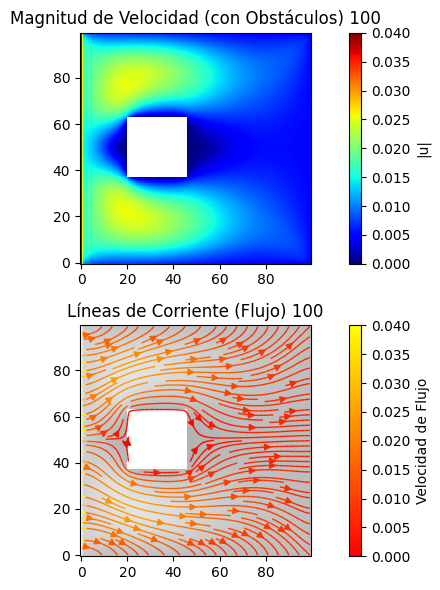

Cargando build/200/snapshot_04000.csv...


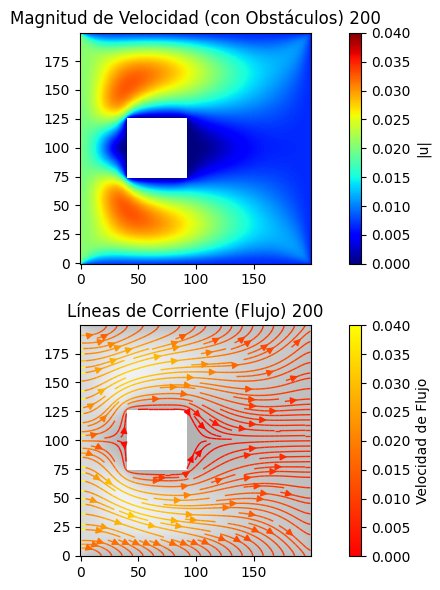

Cargando build/300/snapshot_04000.csv...


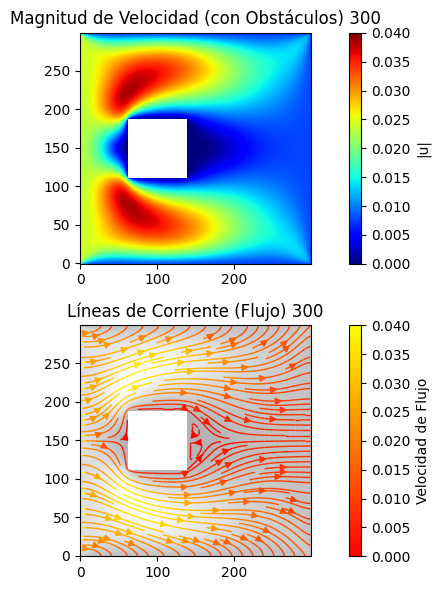

Cargando build/500/snapshot_04000.csv...


FileNotFoundError: [Errno 2] No such file or directory: 'build/500/snapshot_04000.csv'

In [33]:
path = "build/"
carpetas = ["100", "200", "300", "500"]

for i in carpetas:
    plot_snapshot(path + i + "/snapshot_04000.csv", name = i)

In [30]:
r100 = 0.6
r200 = 200/100 * (r100 - 0.5) + 0.5
r300 = 300/100 * (r100 - 0.5) + 0.5
r500 = 500/100 * (r100 - 0.5) + 0.5
r200

0.7

Cargando build/distintas formas/snapshot_04000.csv...


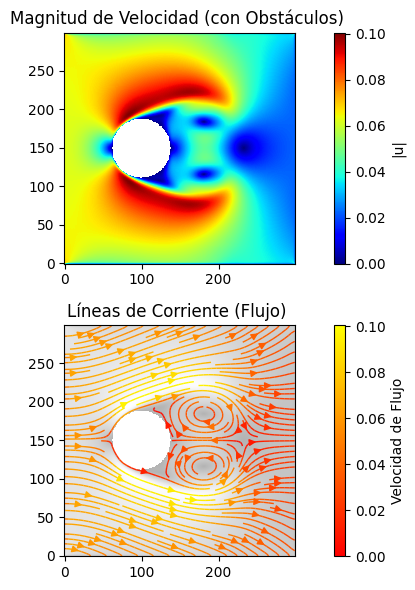

Cargando build/distintas formas/snapshot_04000_2.csv...


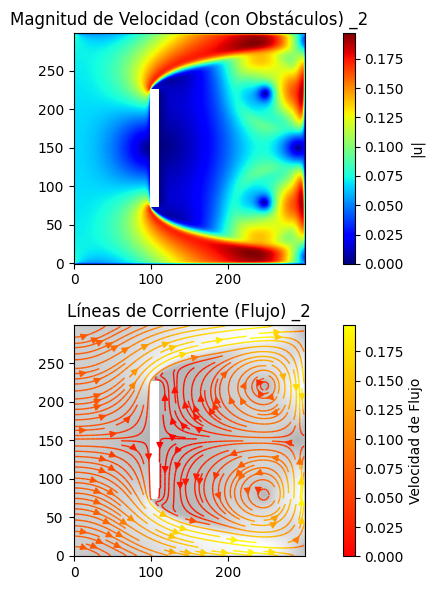

Cargando build/distintas formas/snapshot_04000_3.csv...


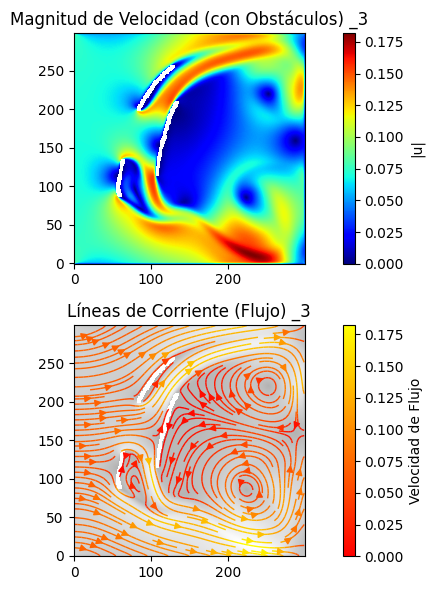

In [35]:
path = "build/distintas formas"
carpetas = ["", "_2", "_3"]

for i in carpetas:
    plot_snapshot(f"{path}/snapshot_04000{i}.csv", name = i)